In [316]:
import pandas as pd ## here I am using pandas, I am using pandas to be able to read a csv file and get information out of the file

In [317]:
df = pd.read_csv("PremierLeagueSeason2024.csv") ## this line of code uses pandas to read my csv file
df.sample(5, random_state=44) ## create a random sample without replacement of a specified length. Once an object has been selected, it will not be selected again.

team  goals_scored  goals_conceded  wins  draws  \
18              Southampton            47              68    12      7   
2                   Arsenal           146              68    46     12   
11  Wolverhampton Wanderers            86             117    25     16   
1                 Liverpool           154              83    44     19   
4                   Chelsea           135              99    37     19   

    losses  points  goal_difference  rank  
18      19      43              -21    19  
2       18     150               78     3  
11      35      91              -31    12  
1       13     151               71     2  
4       20     130               36     5

In [318]:
dataArr = ["goals_scored", "goals_conceded", "wins"] ## here I am using these columns in my dataset to try and predict from
X = df[dataArr] ## here I am making a datafram of my above array, a dataframe is a data structure in python to make a grid of rows and cols 
y = df["team"] ## this is my target colunm I am trying to predict

In [319]:
print(X) ## this is what is in my dataframe named "X"

    goals_scored  goals_conceded  wins
0            179              66    55
1            154              83    44
2            146              68    46
3            130             102    39
4            135              99    37
5            142             106    38
6            131             107    36
7            122             121    33
8             87              99    30
9            131             124    30
10            98             124    25
11            86             117    25
12            95             108    21
13            82             114    18
14            68              50    20
15            74             133    15
16            62              54    18
17            54              67    13
18            47              68    12
19            56              65    10
20            55             167    10
21            49              67     9
22            52              85     6
23            35              76     5


In [320]:
from sklearn.model_selection import train_test_split ## this import is used to split the data into two parts, the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) ## random state controls the randomless of the splitting of the data 
## into diffrent sections. 

# X_train = Features for training
# X_test = Features for testing
# y_train = Labels for training
# y_test = Labels for testing


from sklearn.ensemble import RandomForestClassifier ## this import is needed if you want to be able to make a random forest model
rfModel = RandomForestClassifier(max_depth=3, n_estimators=5, random_state=44) ## here I am telling my random forest to only go down three times 

rfModel.fit(X_train, y_train) ## here I train my random forest model on my X dataframe and y from above

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=44)

In [321]:
rfModel.classes_ ## when I do my random forest I am getting all of my class names aka each team name 

array(['Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Crystal Palace', 'Everton',
       'Fulham', 'Luton Town', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Nottingham Forest', 'Sheffield United',
       'West Bromwich Albion', 'West Ham United'], dtype=object)

In [322]:
important = rfModel.feature_importances_  ## this tells me how important each thing is in my dataset
cols = X.columns ## due to X being a dataframe we can get each colunm
i = 0

In [323]:
while i<len(cols):
    print(f"the importance of feature  '{cols[i]}' is {round(important[i] * 100, 2)}%. ") ## this line of code rounds the importances to round a number to a given precision in decimal digits.
    i+=1

the importance of feature  'goals_scored' is 51.31%. 
the importance of feature  'goals_conceded' is 40.12%. 
the importance of feature  'wins' is 8.57%. 


In [324]:
checkData = [[125, 97, 35]]
rfModel.predict(checkData) ## here I am using my random forest, the predict method takes in a dataframe aka a rows and cols

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Manchester United'], dtype=object)

In [325]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

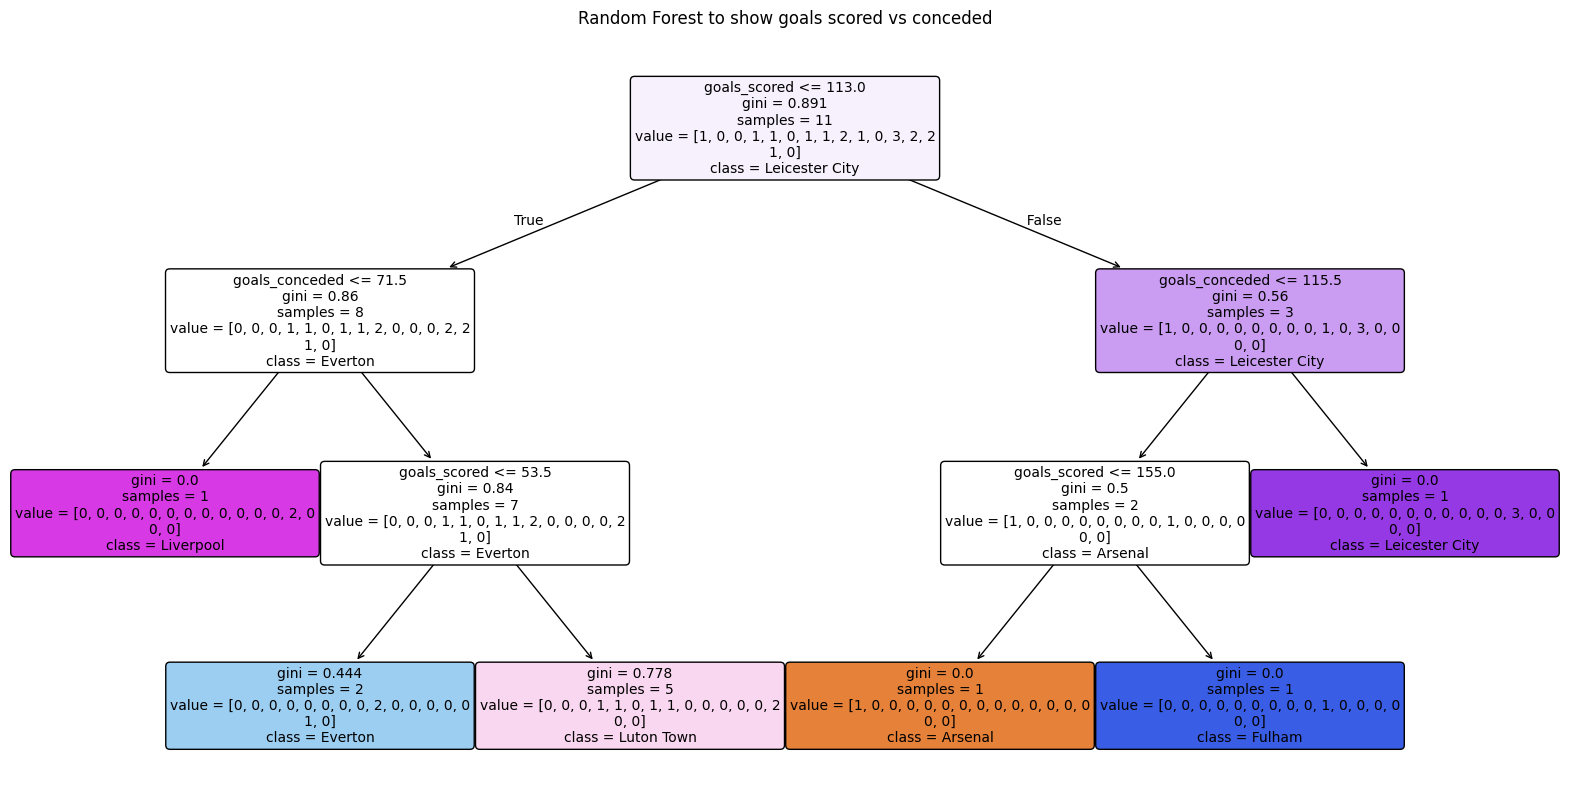

In [326]:
tree = rfModel.estimators_[0] ## here I take out one of the trees out of the 5 
plt.figure(figsize=(20,10))  # here I make the size a bit big to make the tree more readable

plot_tree(tree, 
          feature_names=dataArr,  # here I put in my dataframe 
          class_names=[str(c) for c in sorted(y.unique())], ## here I iterate over each unique values in y(team), then the result is sorted
          filled=True, # here I fill each node with a colour for better visualization
          rounded=True) # here I round the edges on every node

plt.title("Random Forest to show goals scored vs conceded") ## here I give my plotted tree a title
plt.show() ## this part of the code shows my below random forest